In [1]:
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:100% !important; } </style>"))

# Simple Linear Regression

We need to read our data from a <tt>csv</tt> file.  The module `csv` offers a number of functions for reading and writing a <tt>csv</tt> file.

In [2]:
import csv

The data we want to read is contained in the <tt>csv</tt> file `'cars.csv'`.  In this file, the first column has the *miles per gallon*, while the *engine displacement* is given in the third column.  We convert *miles per gallon* into *km per liter* and *cubic inches* into *liters*.

In [3]:
with open('cars.csv') as cars_file:
    reader       = csv.reader(cars_file, delimiter=',')
    line_count   = 0
    kpl          = []
    displacement = []
    for row in reader:
        if line_count != 0:  # skip header of file
            kpl         .append(float(row[0]) * 0.00425144) # miles per gallon is in first column 
            displacement.append(float(row[2]) * 0.0163871)  # engine displacement is in third column
        line_count += 1
print(f'{line_count} lines read')

393 lines read


Now `consumption` is a list of floating point numbers specifying the fuel consumption, while the list `displacement` contains the corresponding *engine displacements* measured in cubic inches.

In [4]:
print(consumption)

[0.07652592000000001, 0.06377160000000001, 0.07652592000000001, 0.06802304, 0.07227448, 0.06377160000000001, 0.05952016, 0.05952016, 0.05952016, 0.06377160000000001, 0.06377160000000001, 0.05952016, 0.06377160000000001, 0.05952016, 0.10203456000000001, 0.09353168, 0.07652592000000001, 0.08928024000000001, 0.11478888000000001, 0.11053744000000001, 0.106286, 0.10203456000000001, 0.106286, 0.11053744000000001, 0.08928024000000001, 0.04251440000000001, 0.04251440000000001, 0.04676584, 0.038262960000000006, 0.11478888000000001, 0.11904032, 0.106286, 0.08077736, 0.06802304, 0.07227448, 0.08077736, 0.07652592000000001, 0.05952016, 0.05952016, 0.05952016, 0.05952016, 0.051017280000000005, 0.05526872000000001, 0.05526872000000001, 0.07652592000000001, 0.09353168, 0.08077736, 0.07652592000000001, 0.09778312000000002, 0.11904032, 0.12754320000000002, 0.12754320000000002, 0.13179464000000002, 0.14880040000000003, 0.11478888000000001, 0.11053744000000001, 0.10203456000000001, 0.106286, 0.0977831200

In [5]:
print(displacement)

[5.0308397000000005, 5.735485000000001, 5.2110978, 4.981678400000001, 4.9489042, 7.0300659, 7.439743400000001, 7.210324000000001, 7.4561305, 6.390969000000001, 6.2762593, 5.571614, 6.55484, 7.4561305, 1.8517423000000002, 3.2446458000000002, 3.2610329000000005, 3.27742, 1.5895487000000001, 1.5895487000000001, 1.8025810000000002, 1.7534197000000002, 1.7042584, 1.9828391000000003, 3.2610329000000005, 5.899356000000001, 5.0308397000000005, 5.2110978, 4.981678400000001, 1.5895487000000001, 2.294194, 1.8517423000000002, 3.8018072000000003, 3.6870975000000006, 4.096775, 4.096775, 3.8018072000000003, 5.735485000000001, 6.55484, 5.751872100000001, 5.2110978, 6.2762593, 6.55484, 6.55484, 4.227871800000001, 2.294194, 4.096775, 4.096775, 1.9992262000000003, 1.9009036000000001, 1.2945809000000001, 1.4420648000000003, 1.1634841, 1.1798712, 1.5895487000000001, 1.4912261000000002, 1.8517423000000002, 1.5977422500000003, 1.5895487000000001, 2.294194, 1.9992262000000003, 5.735485000000001, 6.55484, 5.21

The number of data pairs of the form $\langle x, y \rangle$ that we have read is stored in the variable `m`.

In [6]:
m = len(displacement)
m

392

In order to be able to plot the *fuel efficiency* versus the *engine displacement* and  we turn the lists `displacement` and `mpg` into `numpy` arrays.  This is also very usefull in order to compute the coefficients $\vartheta_0$ and $\vartheta_1$ later.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Since *miles per gallon* is the inverse of the fuel consumption, the vector `Y` is defined as follows:

In [8]:
X = np.array(displacement)

In [9]:
Y = np.array([1 / consumption[i] for i in range(m)])

Text(0.5,1,'fuel consumption versus engine displacement')

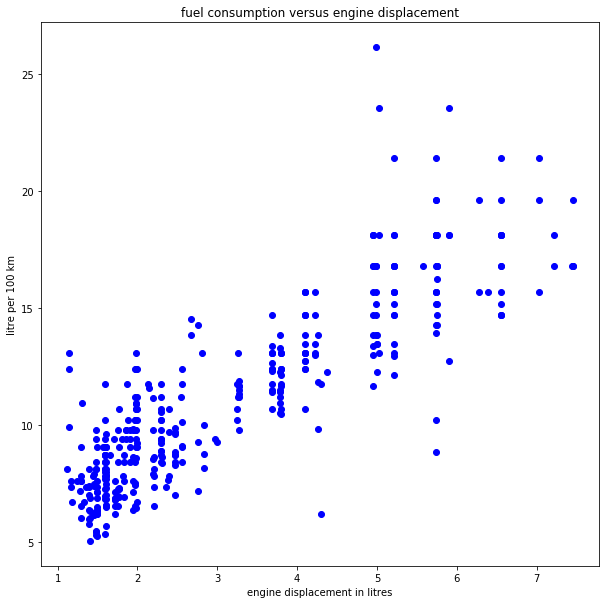

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, c='b')
plt.xlabel('engine displacement in litres')
plt.ylabel('litre per 100 km')
plt.title('fuel consumption versus engine displacement')

We compute the average engine displacement according to the formula:
$$ \bar{\mathbf{x}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m x_i $$ 

In [11]:
xMean = sum(X) / m
xMean

3.1858487179846935

We compute the average fuel consumption according to the formula:
$$ \bar{\mathbf{y}} = \frac{1}{m} \cdot \sum\limits_{i=1}^m y_i $$ 

In [12]:
yMean = sum(Y) / m
yMean

11.248524710692042

The coefficient $\vartheta_1$ is computed according to the formula:
$$ \vartheta_1 = \frac{\sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr) \cdot \bigl(y_i - \bar{\mathbf{y}}\bigr)}{
                       \sum\limits_{i=1}^m \bigl(x_i - \bar{\mathbf{x}}\bigr)^2}  
$$

In [13]:
ϑ1 = sum( (X - xMean) * (Y - yMean) ) / sum((X - xMean) ** 2)
ϑ1

1.9766467214638832

The coefficient $\vartheta_0$ is computed according to the formula:
$$ \vartheta_0 = \bar{\mathbf{y}} - \vartheta_1 \cdot \bar{\mathbf{x}} $$ 

In [14]:
ϑ0 = yMean - ϑ1 * xMean
ϑ0

4.951227287207682

Let us plot the line $y(x) = ϑ0 + ϑ1 \cdot x$ together with our data:

Text(0.5,1,'Fuel Consumption versus Engine Displacement')

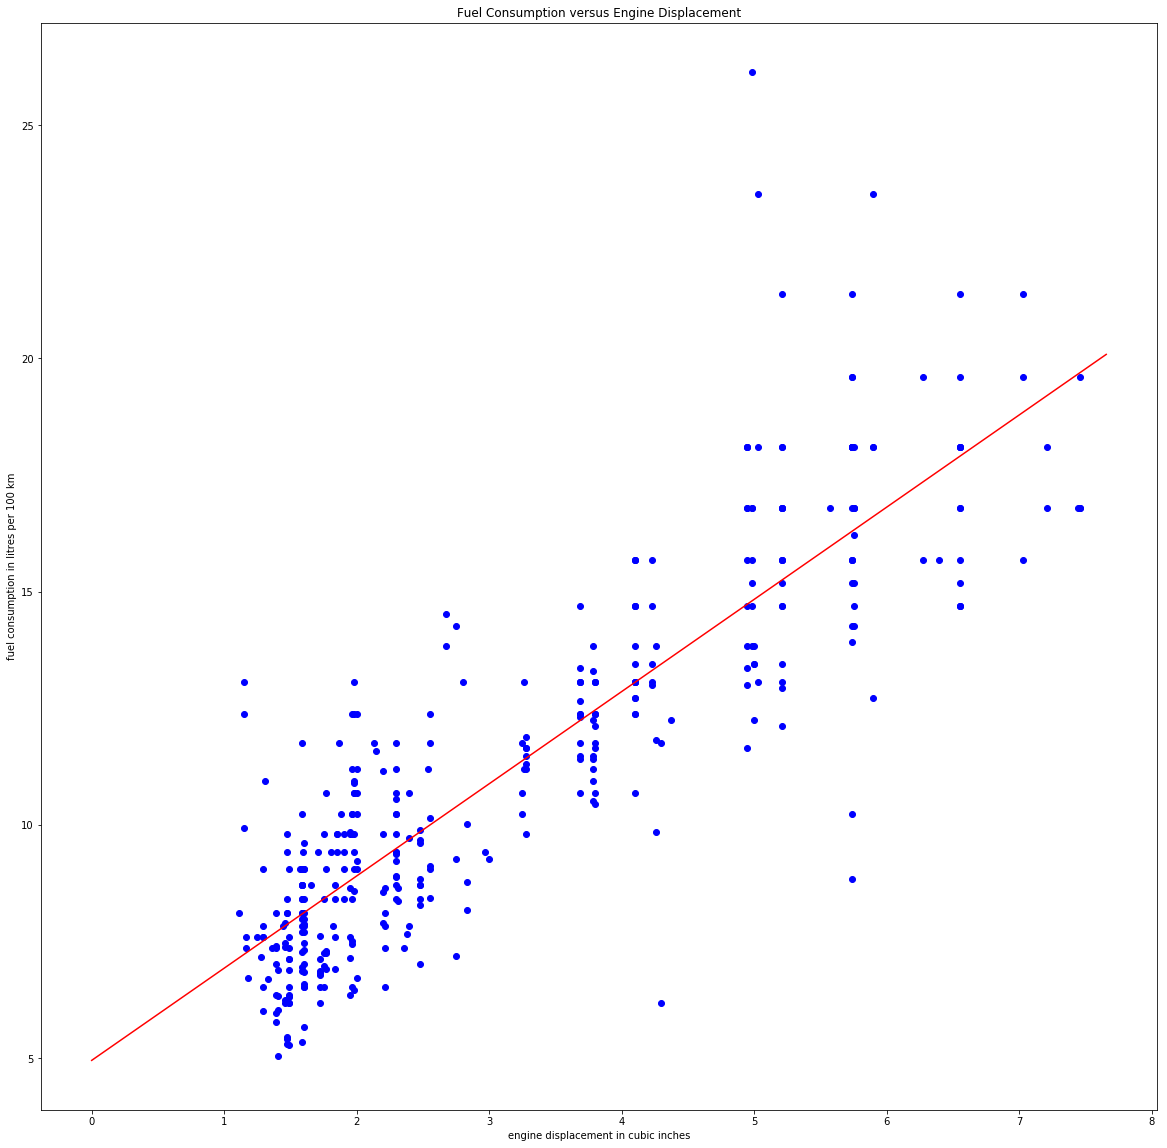

In [15]:
xMax = max(X) + 0.2
plt.figure(figsize=(20, 20))
plt.scatter(X, Y, c='b')
plt.plot([0, xMax], [ϑ0, ϑ0 + ϑ1 * xMax], c='r')
plt.xlabel('engine displacement in cubic inches')
plt.ylabel('fuel consumption in litres per 100 km')
plt.title('Fuel Consumption versus Engine Displacement')

We see there is quite a bit of variation and apparently the engine displacement explains only a part of the fuel consumption.  In order compute the coefficient of determination, i.e. the statistics $R^2$, we first compute the *total sum of squares* `TSS`according to the following formula:
$$ \mathtt{TSS} := \sum\limits_{i=1}^m \bigl(y_i - \bar{\mathbf{y}}\bigr)^2 $$

In [16]:
TSS = sum((Y - yMean) ** 2)
TSS

5989.3812543556805

Next, we compute the *residual sum of squares* `RSS` as follows:
$$ \mathtt{RSS} := \sum\limits_{i=1}^m \bigl(\vartheta_1 \cdot x_i + \vartheta_0 - y_i\bigr)^2 $$
    

In [17]:
RSS = sum((ϑ1 * X + ϑ0 - Y) ** 2)
RSS

1497.0913526477116

Now $R^2$ is calculated via the formula:
$$ R^2 = 1 - \frac{\mathtt{RSS}}{\mathtt{TSS}}$$

In [18]:
R2 = 1 - RSS/TSS
R2

0.750042401865973

It seems that about $75\%$ of the fuel consumption is explained by the engine displacement.  We can get a better model of the fuel consumption if we use more variables for explaining the fuel consumption.  For example, the weight of a car is also responsible for its fuel consumption.